In [1]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Input
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import matplotlib.image as img
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D , GlobalAvgPool2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from pathlib import Path
import numpy as np
import cv2
from keras.preprocessing.image import load_img
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import os
from PIL import Image
import time
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
labels = ['Blight', 'Common_Rust','Gray_Leaf_Spot','Healthy']
#defining the image size to 
img_size = 256
#defining a function called getdata to get the data and resize it to the image size of 
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_ar = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_ar, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
              print(e)
    return np.array(data)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = get_data('/content/drive/MyDrive/Colab Notebooks/maize/data')
#Assigning them to a dataframe with columns images and labels 
data=pd.DataFrame(df, columns=['images','labels'])
data = data.sample(frac=1).reset_index(drop=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


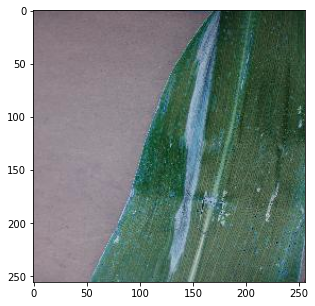

In [ ]:
#Displaying a sample image of the object
plt.figure(figsize = (5,5))
plt.imshow(df[2][0])

In [ ]:
x1=np.array(list(data.images))
y1=np.array(list(data.labels))
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(x1, y1,stratify=y1,test_size=0.12, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,stratify=y_train,test_size=0.1363, random_state=10)
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255
Y_train = to_categorical(y_train)
Y_test =  to_categorical(y_test)
Y_val =  to_categorical(y_val)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(3182, 256, 256, 3)
(503, 256, 256, 3)
(503, 256, 256, 3)
(3182,)
(503,)
(503,)


In [ ]:
data_generator = ImageDataGenerator(rotation_range = 30,
                                         width_shift_range = 0.2, 
                                         height_shift_range = 0.2,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         vertical_flip = True)

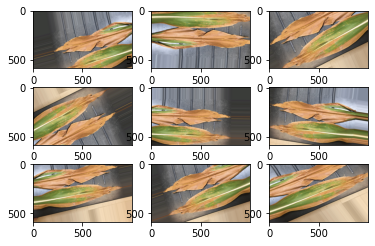

In [ ]:
image=load_img('/content/drive/MyDrive/Colab Notebooks/maize/data/Blight/Corn_Blight (1).jpeg')
data = img_to_array(image)
from numpy import expand_dims
samples = expand_dims(data, 0)
it = data_generator.flow(samples, batch_size=1)
import matplotlib.pyplot as plt
for i in range(9):
        plt.subplot(330 + 1 + i)
        batch = it.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
plt.show()

In [ ]:
train_ds = data_generator.flow(x_train, Y_train,batch_size = 32)
val_ds = data_generator.flow(x_val, Y_val,batch_size = 32)
test_ds = data_generator.flow(x_test, Y_test,batch_size = 32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 85, 85, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 42, 42, 16)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 28224)             0         
                                                                 
 dense_12 (Dense)            (None, 8)                

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds, 
                    epochs=50,
                    validation_data=val_ds)

Epoch 1/50
100/100 [==============================] - 47s 470ms/step - loss: 1.1186 - accuracy: 0.5531 - val_loss: 0.8992 - val_accuracy: 0.6243
Epoch 2/50
100/100 [==============================] - 47s 474ms/step - loss: 0.7595 - accuracy: 0.7561 - val_loss: 0.7116 - val_accuracy: 0.7495
Epoch 3/50
100/100 [==============================] - 45s 451ms/step - loss: 0.6290 - accuracy: 0.7857 - val_loss: 0.5855 - val_accuracy: 0.8012
Epoch 4/50
100/100 [==============================] - 46s 459ms/step - loss: 0.5902 - accuracy: 0.7945 - val_loss: 0.5731 - val_accuracy: 0.7873
Epoch 5/50
100/100 [==============================] - 46s 456ms/step - loss: 0.5536 - accuracy: 0.8070 - val_loss: 0.5948 - val_accuracy: 0.7992
Epoch 6/50
100/100 [==============================] - 45s 451ms/step - loss: 0.5328 - accuracy: 0.8074 - val_loss: 0.5347 - val_accuracy: 0.8091
Epoch 7/50
100/100 [==============================] - 45s 454ms/step - loss: 0.5284 - accuracy: 0.8064 - val_loss: 0.5160 - val_ac

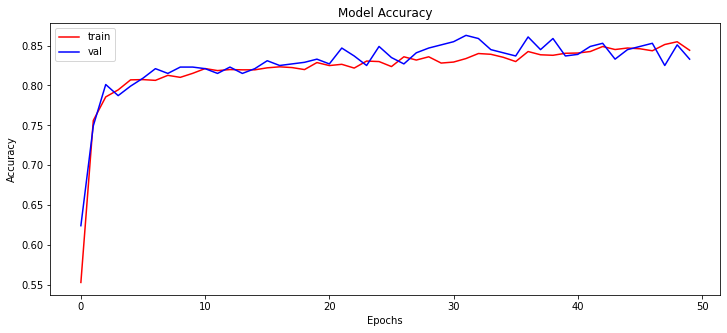

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print('test_acc:', test_acc)

16/16 [==============================] - 6s 384ms/step - loss: 0.3789 - accuracy: 0.8449
test_acc: <keras.preprocessing.image.NumpyArrayIterator object at 0x7f0b18763a10>


In [ ]:
model.save("model1.h5")

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(256,256,3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 252, 252, 64)      4864      
                                                                 
 batch_normalization_13 (Bat  (None, 252, 252, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 248, 248, 64)      102464    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 124, 124, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Bat  (None, 124, 124, 64)     256       
 chNormalization)                                                
                                                      

In [ ]:
history=model.fit(train_ds, 
                    epochs=15,
                    validation_data=val_ds)

Epoch 1/15
100/100 [==============================] - 49s 477ms/step - loss: 0.8194 - accuracy: 0.7153 - val_loss: 3.0245 - val_accuracy: 0.3121
Epoch 2/15
100/100 [==============================] - 47s 473ms/step - loss: 0.6206 - accuracy: 0.7693 - val_loss: 1.1222 - val_accuracy: 0.5368
Epoch 3/15
100/100 [==============================] - 47s 466ms/step - loss: 0.4691 - accuracy: 0.8196 - val_loss: 2.3662 - val_accuracy: 0.3499
Epoch 4/15
100/100 [==============================] - 47s 466ms/step - loss: 0.4575 - accuracy: 0.8136 - val_loss: 1.3114 - val_accuracy: 0.6362
Epoch 5/15
100/100 [==============================] - 47s 472ms/step - loss: 0.4148 - accuracy: 0.8306 - val_loss: 1.1934 - val_accuracy: 0.7137
Epoch 6/15
100/100 [==============================] - 47s 469ms/step - loss: 0.4317 - accuracy: 0.8341 - val_loss: 0.5378 - val_accuracy: 0.8151
Epoch 7/15
100/100 [==============================] - 47s 470ms/step - loss: 0.3941 - accuracy: 0.8498 - val_loss: 1.4617 - val_ac

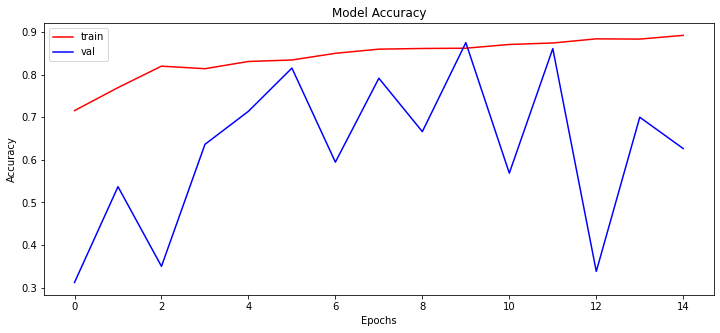

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

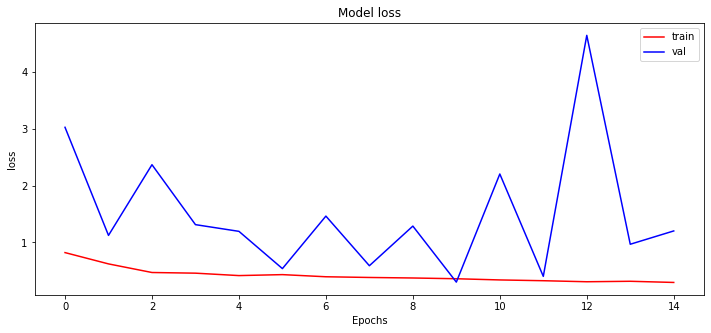

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print('test_acc:', test_acc)

16/16 [==============================] - 6s 394ms/step - loss: 1.3536 - accuracy: 0.6123
test_acc: <keras.preprocessing.image.NumpyArrayIterator object at 0x7f0b18763a10>


In [ ]:
model.save('model_1.h5')

In [ ]:
AlexNet

In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import MobileNetV2
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

adam = Adam(lr= 0.0001, decay=0.0001 / 10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_ds, 
                    epochs=10,
                    validation_data=val_ds)

Epoch 1/10
100/100 [==============================] - 47s 463ms/step - loss: 1.2814 - accuracy: 0.7206 - val_loss: 3.2450 - val_accuracy: 0.2724
Epoch 2/10
100/100 [==============================] - 45s 455ms/step - loss: 0.7311 - accuracy: 0.8008 - val_loss: 3.6586 - val_accuracy: 0.2823
Epoch 3/10
100/100 [==============================] - 46s 458ms/step - loss: 0.5951 - accuracy: 0.8039 - val_loss: 1.8413 - val_accuracy: 0.5010
Epoch 4/10
100/100 [==============================] - 46s 456ms/step - loss: 0.4982 - accuracy: 0.8215 - val_loss: 0.9414 - val_accuracy: 0.7197
Epoch 5/10
100/100 [==============================] - 46s 456ms/step - loss: 0.4338 - accuracy: 0.8466 - val_loss: 0.9907 - val_accuracy: 0.6899
Epoch 6/10
100/100 [==============================] - 46s 456ms/step - loss: 0.3986 - accuracy: 0.8620 - val_loss: 0.5412 - val_accuracy: 0.8250
Epoch 7/10
100/100 [==============================] - 45s 451ms/step - loss: 0.3707 - accuracy: 0.8746 - val_loss: 0.7557 - val_ac

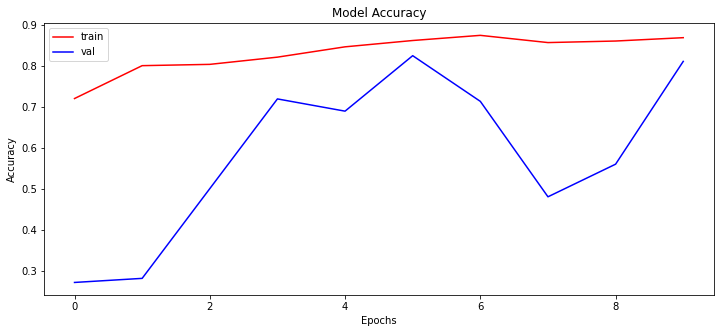

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print('test_acc:', test_acc)

16/16 [==============================] - 6s 387ms/step - loss: 1.0871 - accuracy: 0.7952
test_acc: <keras.preprocessing.image.NumpyArrayIterator object at 0x7f0b18763a10>


In [ ]:
model.save("alexnet.h5")

In [ ]:
import keras
model2 = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])

In [ ]:
import tensorflow as tf
model2.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [ ]:
history = model2.fit(train_ds, 
                    epochs=50,
                    validation_data=val_ds)

Epoch 1/50
100/100 [==============================] - 47s 456ms/step - loss: 1.0404 - accuracy: 0.4928 - val_loss: 0.8823 - val_accuracy: 0.7455
Epoch 2/50
100/100 [==============================] - 46s 455ms/step - loss: 0.6485 - accuracy: 0.7407 - val_loss: 0.7048 - val_accuracy: 0.7694
Epoch 3/50
100/100 [==============================] - 45s 455ms/step - loss: 0.4762 - accuracy: 0.8114 - val_loss: 0.5787 - val_accuracy: 0.7932
Epoch 4/50
100/100 [==============================] - 45s 451ms/step - loss: 0.4159 - accuracy: 0.8231 - val_loss: 0.4810 - val_accuracy: 0.8330
Epoch 5/50
100/100 [==============================] - 45s 454ms/step - loss: 0.4180 - accuracy: 0.8268 - val_loss: 0.4498 - val_accuracy: 0.8290
Epoch 6/50
100/100 [==============================] - 45s 454ms/step - loss: 0.3726 - accuracy: 0.8454 - val_loss: 0.3611 - val_accuracy: 0.8489
Epoch 7/50
100/100 [==============================] - 45s 455ms/step - loss: 0.3600 - accuracy: 0.8558 - val_loss: 0.3610 - val_ac

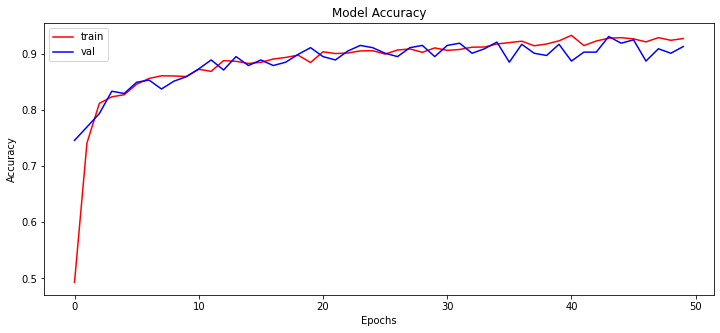

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

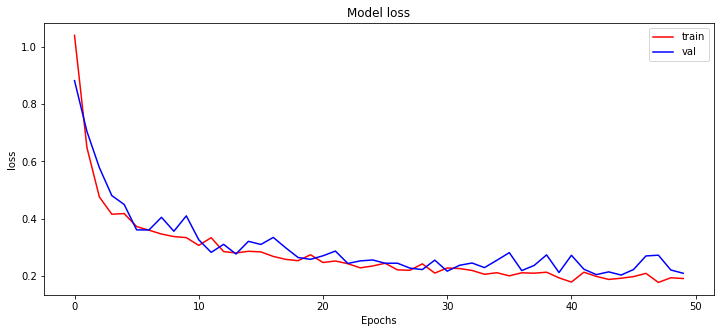

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(test_ds)
print('test_acc:', test_acc)

16/16 [==============================] - 6s 385ms/step - loss: 0.2301 - accuracy: 0.8986
test_acc: <keras.preprocessing.image.NumpyArrayIterator object at 0x7f0b18763a10>


In [ ]:
model2.save('model2.h5')

In [ ]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  print(layer.name)
  layer.trainable = False

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)

In [ ]:
model = tf.keras.Model(pre_trained_model.input, x)
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [ ]:
vgg_classifier = model.fit(train_ds,epochs = 50,validation_data=val_ds,batch_size = 32,verbose = 1)

Epoch 1/50
100/100 [==============================] - 50s 483ms/step - loss: 0.7088 - acc: 0.7269 - val_loss: 0.4658 - val_acc: 0.7952
Epoch 2/50
100/100 [==============================] - 47s 472ms/step - loss: 0.4859 - acc: 0.7998 - val_loss: 0.3876 - val_acc: 0.8370
Epoch 3/50
100/100 [==============================] - 49s 492ms/step - loss: 0.4363 - acc: 0.8253 - val_loss: 0.3343 - val_acc: 0.8608
Epoch 4/50
100/100 [==============================] - 48s 477ms/step - loss: 0.3984 - acc: 0.8338 - val_loss: 0.3495 - val_acc: 0.8489
Epoch 5/50
100/100 [==============================] - 46s 464ms/step - loss: 0.3780 - acc: 0.8482 - val_loss: 0.3012 - val_acc: 0.8847
Epoch 6/50
100/100 [==============================] - 47s 468ms/step - loss: 0.3667 - acc: 0.8507 - val_loss: 0.3244 - val_acc: 0.8350
Epoch 7/50
100/100 [==============================] - 49s 492ms/step - loss: 0.3764 - acc: 0.8429 - val_loss: 0.2879 - val_acc: 0.8907
Epoch 8/50
100/100 [==============================] - 4

In [ ]:
history=vgg_classifier

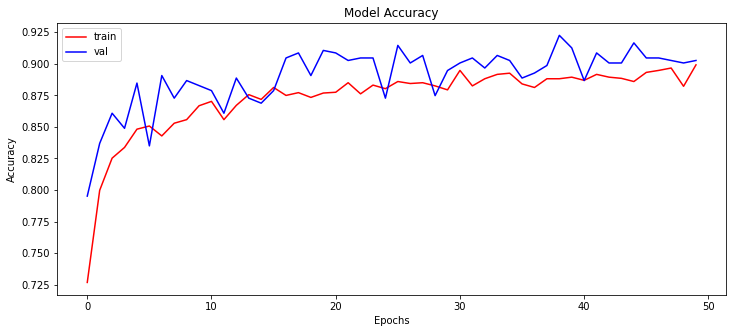

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

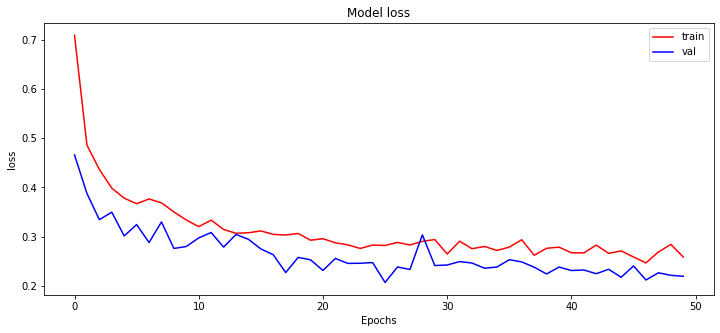

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print('test_acc:', test_acc)

16/16 [==============================] - 6s 395ms/step - loss: 0.2233 - acc: 0.9165
test_acc: <keras.preprocessing.image.NumpyArrayIterator object at 0x7f0b18763a10>


In [ ]:
model.save('vgg.h5')

In [ ]:
import keras
model3 = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])

In [ ]:
import tensorflow as tf
model3.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [ ]:
history = model3.fit(data_generator.flow(x_train,Y_train), 
                    epochs=50,
                    validation_data=(x_val,Y_val))

Epoch 1/50
100/100 [==============================] - 46s 434ms/step - loss: 1.0097 - accuracy: 0.5075 - val_loss: 1.0175 - val_accuracy: 0.3837
Epoch 2/50
100/100 [==============================] - 43s 433ms/step - loss: 0.8549 - accuracy: 0.5987 - val_loss: 1.0767 - val_accuracy: 0.3559
Epoch 3/50
100/100 [==============================] - 44s 436ms/step - loss: 0.5521 - accuracy: 0.7916 - val_loss: 0.7183 - val_accuracy: 0.6839
Epoch 4/50
100/100 [==============================] - 44s 442ms/step - loss: 0.4333 - accuracy: 0.8187 - val_loss: 0.7490 - val_accuracy: 0.6918
Epoch 5/50
100/100 [==============================] - 46s 455ms/step - loss: 0.3953 - accuracy: 0.8309 - val_loss: 0.7593 - val_accuracy: 0.6938
Epoch 6/50
100/100 [==============================] - 44s 442ms/step - loss: 0.3769 - accuracy: 0.8397 - val_loss: 0.4464 - val_accuracy: 0.8748
Epoch 7/50
100/100 [==============================] - 46s 460ms/step - loss: 0.3804 - accuracy: 0.8413 - val_loss: 0.6511 - val_ac

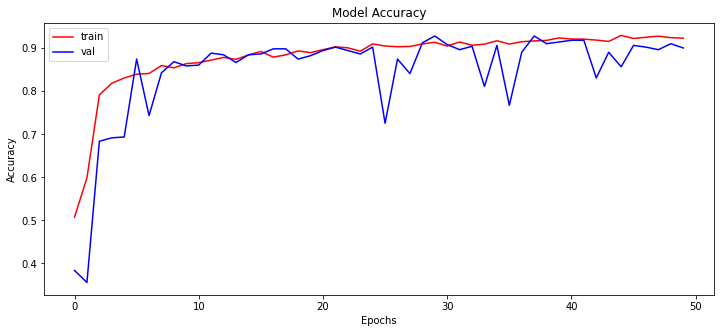

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

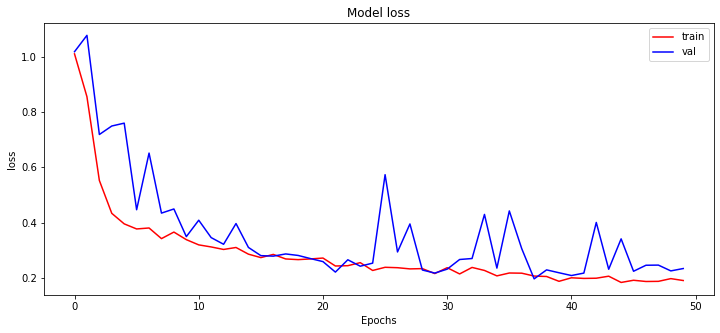

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
test_loss, test_acc = model3.evaluate(x_test,Y_test)
print('test_acc:', test_acc)

NameError: ignored

In [ ]:
model3.save('model3.h5')

# Experiment

In [ ]:
import keras
model4 = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])

In [ ]:
import tensorflow as tf
model4.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [ ]:
history = model4.fit(data_generator.flow(x_train,Y_train), 
                    epochs=100,
                    validation_data=(x_val,Y_val))

Epoch 1/100
100/100 [==============================] - 47s 391ms/step - loss: 1.0220 - accuracy: 0.5280 - val_loss: 0.9185 - val_accuracy: 0.6740
Epoch 2/100
100/100 [==============================] - 39s 387ms/step - loss: 0.7467 - accuracy: 0.6867 - val_loss: 1.0949 - val_accuracy: 0.5149
Epoch 3/100
100/100 [==============================] - 39s 385ms/step - loss: 0.5102 - accuracy: 0.7967 - val_loss: 0.8366 - val_accuracy: 0.6978
Epoch 4/100
100/100 [==============================] - 38s 381ms/step - loss: 0.4310 - accuracy: 0.8152 - val_loss: 0.8012 - val_accuracy: 0.7157
Epoch 5/100
100/100 [==============================] - 39s 388ms/step - loss: 0.4000 - accuracy: 0.8246 - val_loss: 0.5074 - val_accuracy: 0.8529
Epoch 6/100
100/100 [==============================] - 39s 386ms/step - loss: 0.3814 - accuracy: 0.8385 - val_loss: 0.6483 - val_accuracy: 0.7455
Epoch 7/100
100/100 [==============================] - 39s 386ms/step - loss: 0.3472 - accuracy: 0.8482 - val_loss: 0.4038 -

In [ ]:
test_loss, test_acc = model4.evaluate(x_test,Y_test)
print('test_acc:', test_acc)

16/16 [==============================] - 0s 18ms/step - loss: 0.1483 - accuracy: 0.9364
test_acc: 0.9363816976547241


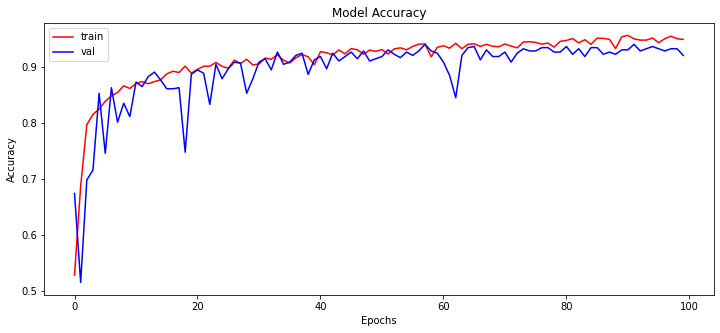

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

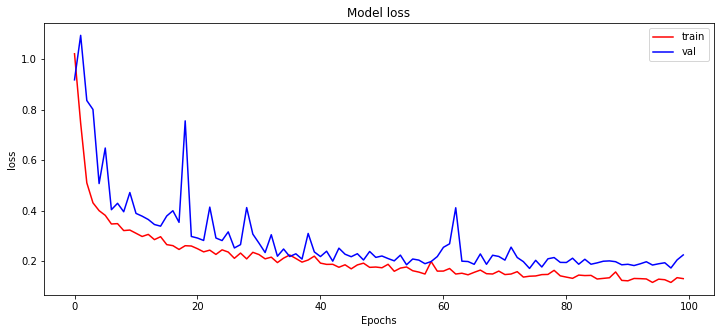

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
model4.save('model4.h5')

# check

In [7]:
import numpy as np
import cv2
from keras.models import load_model

model = load_model('model3.h5')

In [8]:
CLASS_NAMES = ['blight', 'common rust', 'gray','healthy']

In [ ]:
#test_ds.reset()
pred = model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

y_pred = np.argmax(pred, axis=1)

In [ ]:
print(y_pred.shape)
print(y_test.shape)

(503,)
(503,)


In [ ]:
print('Confusion Matrix')
cm_df=pd.DataFrame(confusion_matrix(y_test, y_pred))
cm_df

Confusion Matrix


,0,1,2,3
0,127,0,10,1
1,2,153,2,0
2,10,1,58,0
3,2,0,0,137


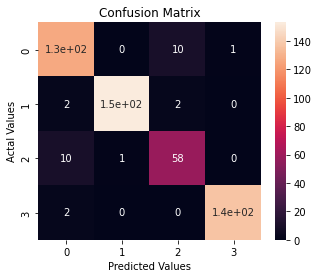

In [ ]:
#Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Rough_work

In [9]:
import numpy as np
from keras.preprocessing import image

img_width, img_height = 256,256
img = image.load_img('crr.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

output=model.predict(img)
np.set_printoptions(suppress=True)
output


array([[0., 1., 0., 0.]], dtype=float32)

In [10]:
Y_pred =model.predict(img)
result = CLASS_NAMES[np.argmax(Y_pred)]
print(result)


common rust


In [ ]:
YY=np.array(Y_pred, dtype=np.float32)

In [ ]:
print(YY[0][0])
print(YY[0][1])
print(YY[0][2])
print(YY[0][3])

0.0
1.0
0.0
0.0
